In [4]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [43]:
path = os.listdir('F:\Code_Python\Selenum\img_captcha_obj')[:10]

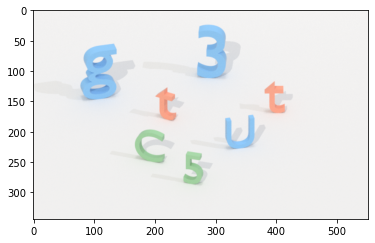

In [30]:
img = cv2.imread('F:/Code_Python/Selenum/img_captcha_obj/' + path)[:,:,::-1]
plt.imshow(img)

In [7]:
def blue(img):
    img_thr_blue = cv2.inRange(img,(95,150,200),(160,210,255))
    contours1 = cv2.findContours(img_thr_blue, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_
    
def green(img):    
    img_thr_green = cv2.inRange(img,(140,160,120),(180,230,180))&(img[:,:,1]-img[:,:,0]>30)&(img[:,:,1]-img[:,:,2]>30)
    contours1 = cv2.findContours(img_thr_green, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_
    
def red(img):   
    img_thr_red = cv2.inRange(img,(220,150,130),(255,200,160))&(img[:,:,0]-img[:,:,1]>30)&(img[:,:,1]>img[:,:,2])
    contours1 = cv2.findContours(img_thr_red, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_
    
def violet(img):    
    img_thr_violet = cv2.inRange(img,(160,105,170),(220,160,230))
    contours1 = cv2.findContours(img_thr_violet, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_
    
def brown(img):    
    img_thr_brown = cv2.inRange(img,(125,115,105),(200,180,175))
    contours1 = cv2.findContours(img_thr_brown, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_
    
def yellow(img):    
    img_thr_yellow =  cv2.inRange(img,(200,200,100),(255,230,150))&(img[:,:,1]-img[:,:,2]>50)&(img[:,:,0]-img[:,:,2]>75)
    
    contours1 = cv2.findContours(img_thr_yellow, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    list_ = []
    for con in contours1[0]:
        if (cv2.contourArea(con) >300):
            x,y,w,h = cv2.boundingRect(con)
            x1,y1,x2,y2 = x,y, x+w ,y+h
            list_.append([x1,y1,x2,y2])
    return list_




In [9]:
def match(img_1, img_2):
    x = img_1 == img_2 
    return np.count_nonzero(x)/10000

In [40]:
def predict(img): 
    # img = cv2.imread('F:/Code_Python/Selenum/img_captcha_obj/' + i)[:,:,::-1]
    list_x_y =    blue(img) + red(img) + brown(img) + violet(img) + green(img) + yellow(img)
    list_ = []
    for x1,y1,x2,y2 in list_x_y:
        x = img[y1:y2,x1:x2]
        
        x = cv2.cvtColor(x,cv2.COLOR_RGB2GRAY)
        x = cv2.resize(x,[100,100])
        otsu_threshold, image_result = cv2.threshold(x, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
        img_thershold = np.uint8(image_result== 0)
        
        list_.append(img_thershold)
    agrmax = {"ti_le" : 0,"index" : [0,1] }
    for i in range(len(list_)) :
        for j in range(i + 1 ,len(list_)):
            l =  match(list_[i],list_[j])
            if l > agrmax["ti_le"] :
                agrmax["ti_le"]  = l 
                agrmax["index"] = [i,j]
    i1,i2 = agrmax["index"]
    return list_x_y[i1],list_x_y[i2],agrmax["ti_le"]
            

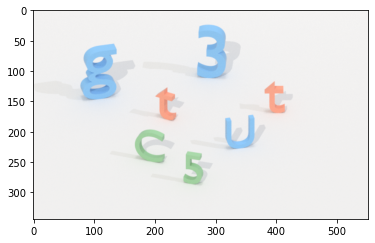

In [41]:
img = cv2.imread('F:/Code_Python/Selenum/img_captcha_obj/' + path)[:,:,::-1]
plt.imshow(img)

0.8532


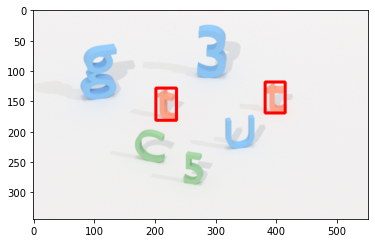

In [42]:
img =img *1
r1,r2,y = predict(img)

x1,y1,x2,y2 = r1
cv2.rectangle(img,(x1,y1),(x2,y2),255,3)

x1,y1,x2,y2 = r2     
cv2.rectangle(img,(x1,y1),(x2,y2),255,3)
plt.imshow(img)
print(y)

In [ ]:
for i in path:
    img = cv2.imread('F:/Code_Python/Selenum/img_captcha_obj/' + i)[:,:,::-1]
    img =img *1
    r1,r2,y = predict(img)

    x1,y1,x2,y2 = r1
    cv2.rectangle(img,(x1,y1),(x2,y2),255,3)

    x1,y1,x2,y2 = r2     
    cv2.rectangle(img,(x1,y1),(x2,y2),255,3)
    plt.imshow(img)
    plt.show()
    print(y)